In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
import logomaker

/Users/alicegao/anaconda2/envs/dg_work/lib/python2.7/site-packages/logomaker/src/Logo.py:10: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/alicegao/anaconda2/envs/dg_work/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/alicegao/anaconda2/envs/dg_work/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/alicegao/anaconda2/envs/dg_work/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/alicegao/anaconda2/envs/dg_work/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File 

In [4]:
import pandas as pd

In [5]:
model = keras.models.load_model('input_data/model.hdf5')

In [6]:
# TODO tie weights for org and rev

In [7]:
# model.get_layer('conv1d_1').get_weights()

In [8]:
# model.get_layer('conv1d_2').get_weights()

In [9]:
def w_to_df(w):
    assert len(w.shape) == 2
    assert w.shape[1] == 4
    data = []
    for i in range(w.shape[0]):
        data.append({
            'A': w[i, 0],
            'C': w[i, 1],
            'G': w[i, 2],
            'U': w[i, 3],
        })
    return pd.DataFrame(data)

Conv layer 1 and 2


/Users/alicegao/anaconda2/envs/dg_work/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/alicegao/anaconda2/envs/dg_work/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


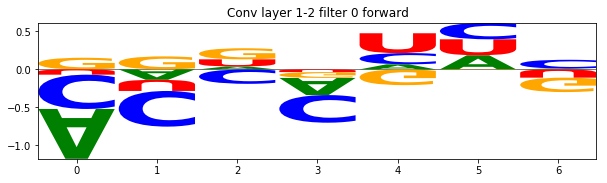

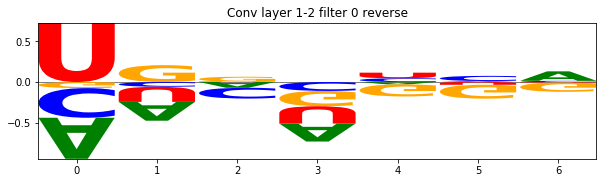

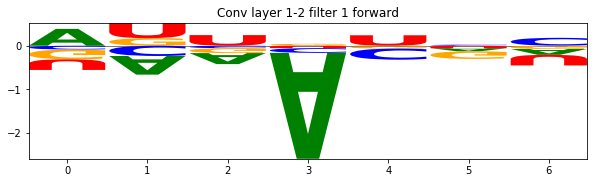

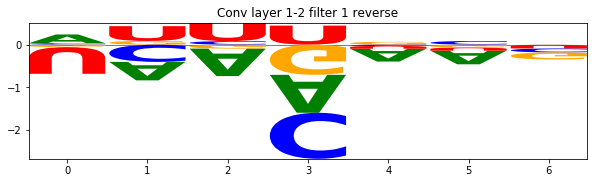

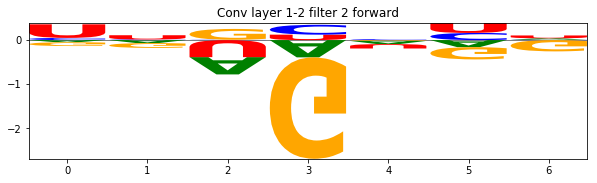

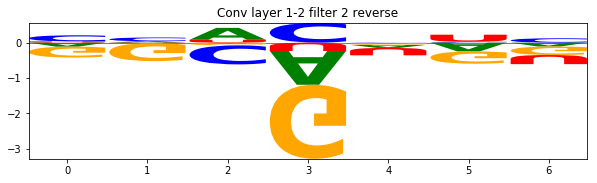

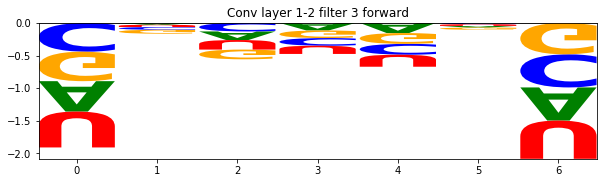

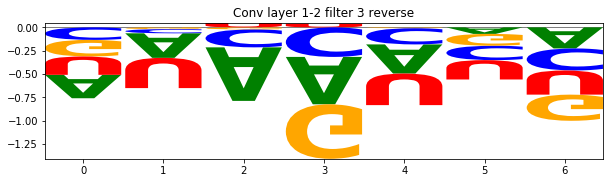

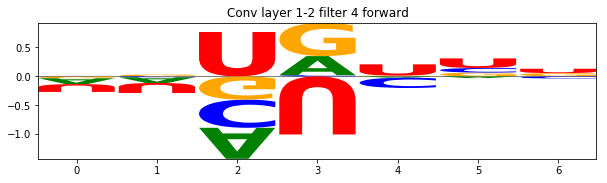

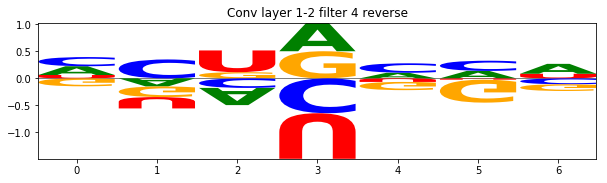

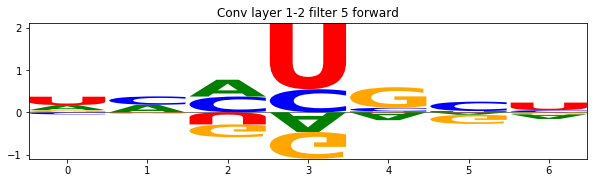

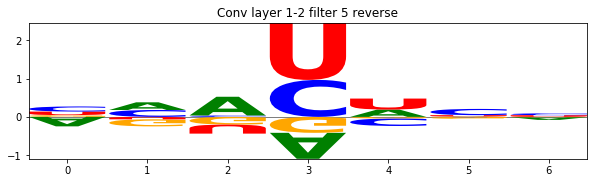

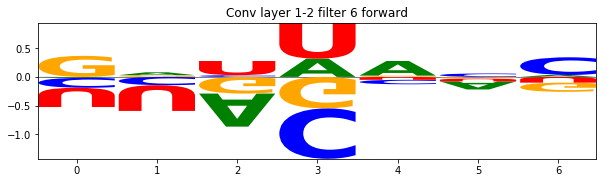

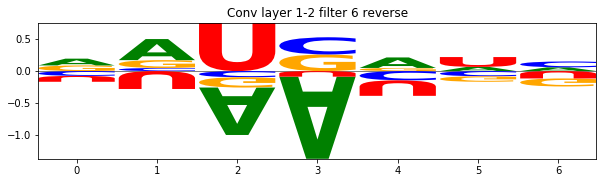

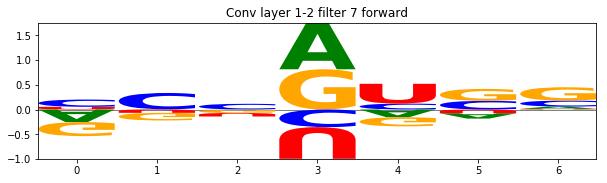

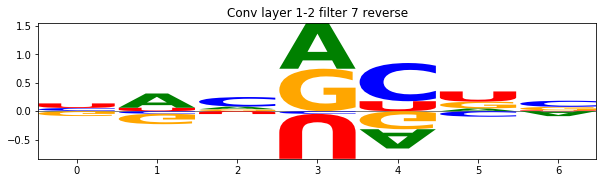

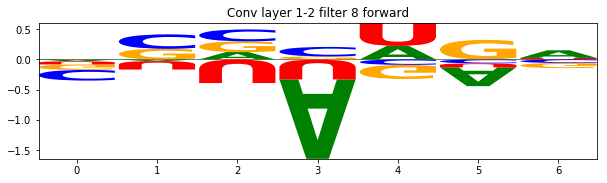

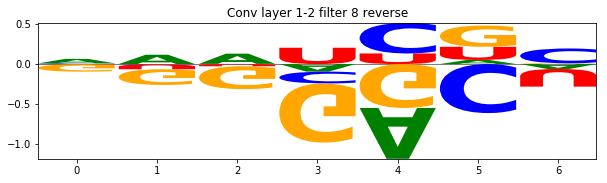

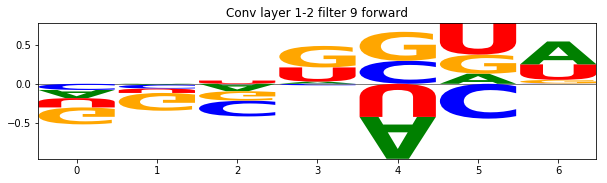

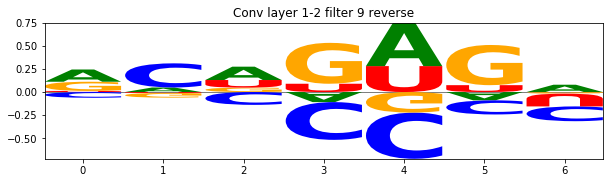

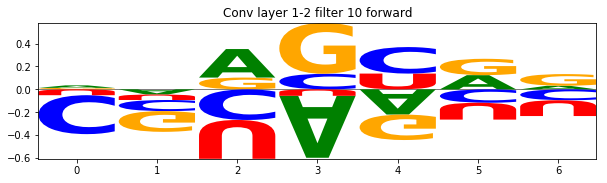

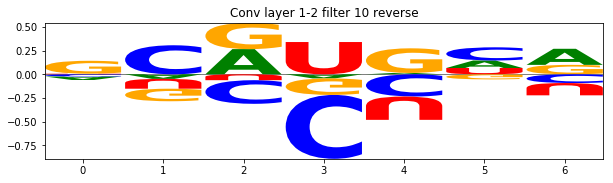

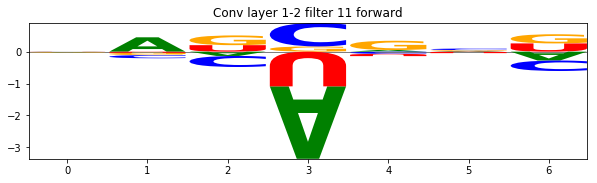

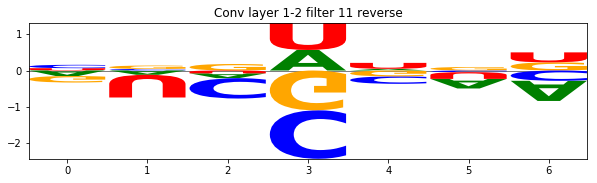

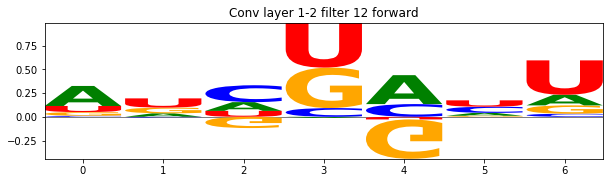

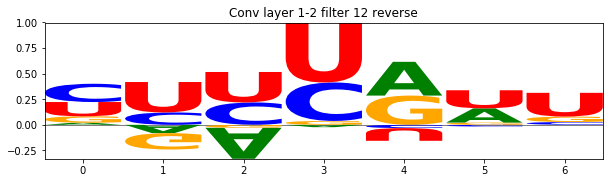

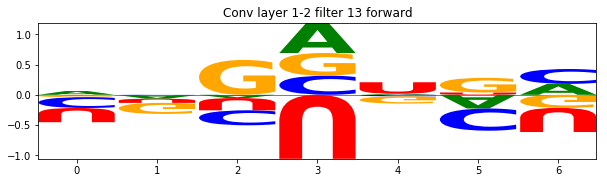

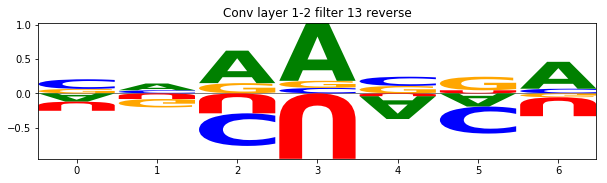

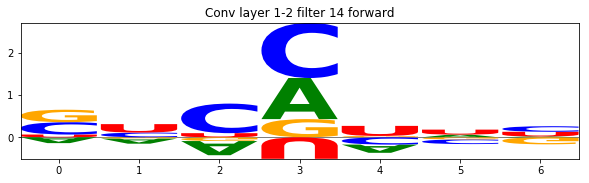

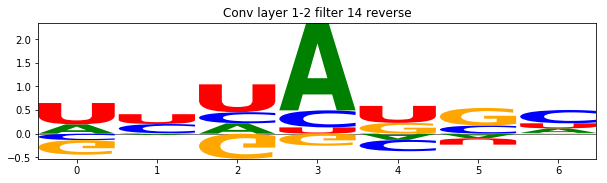

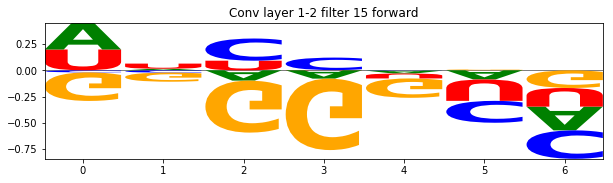

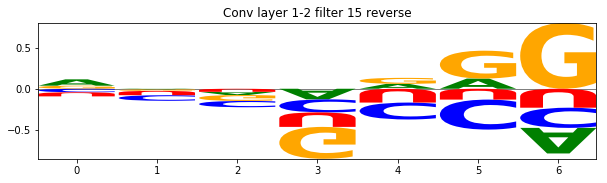

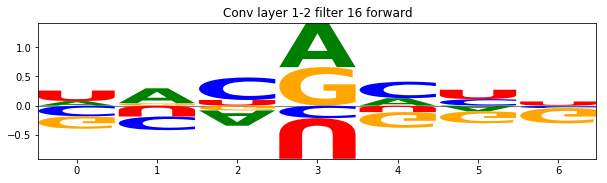

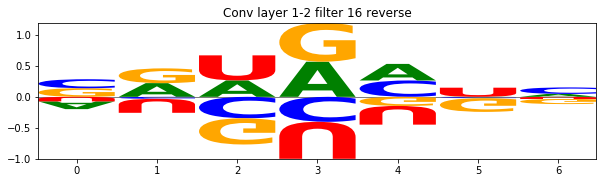

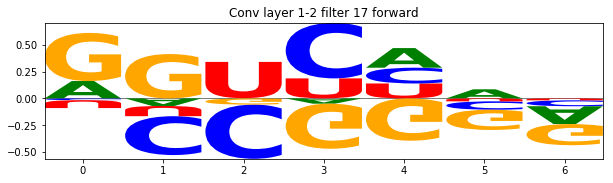

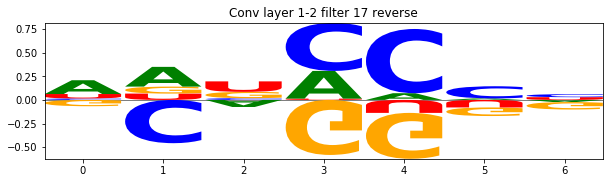

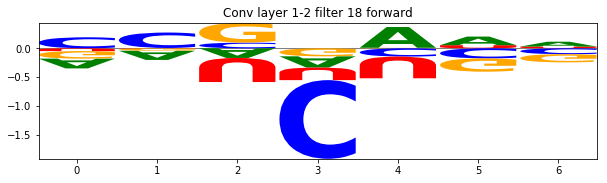

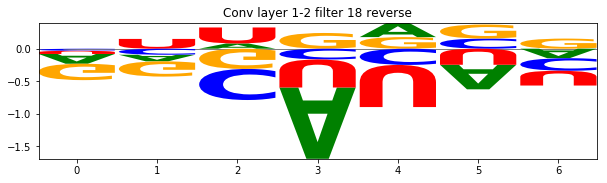

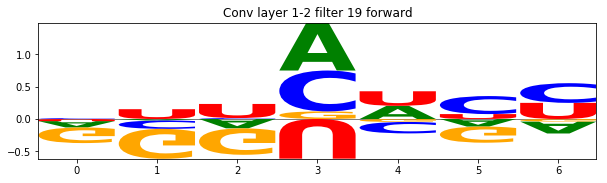

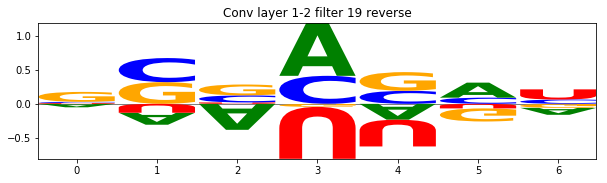

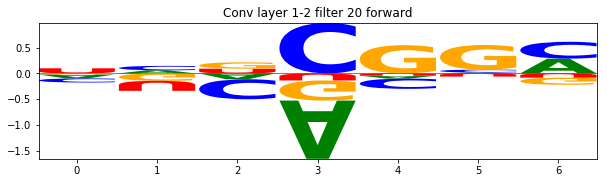

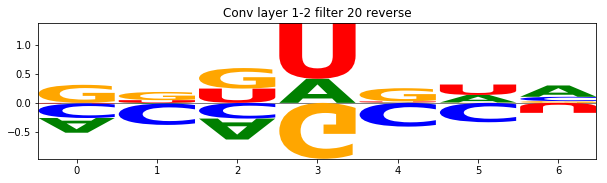

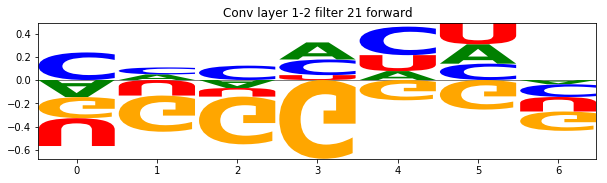

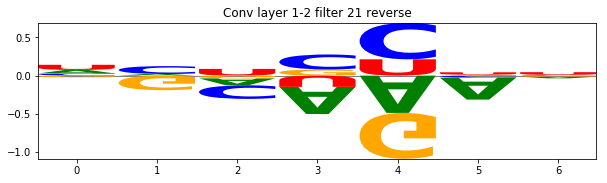

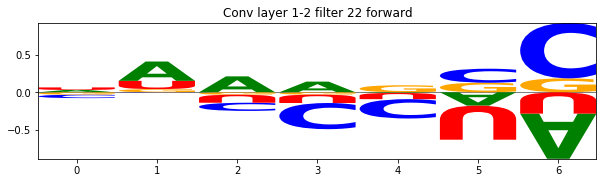

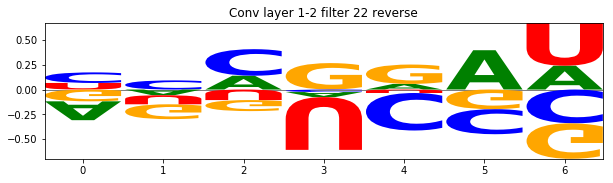

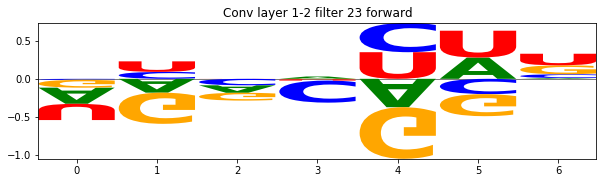

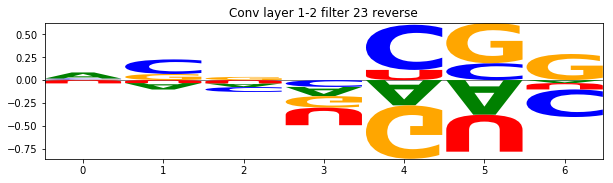

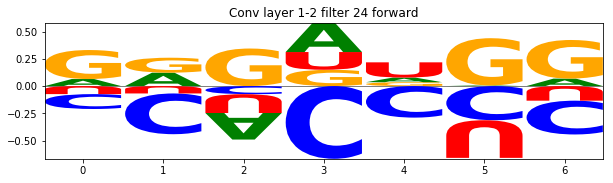

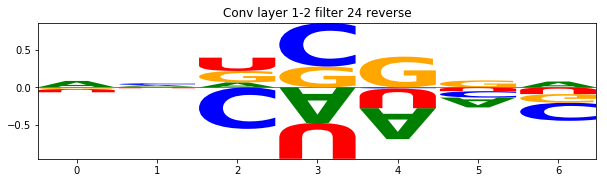

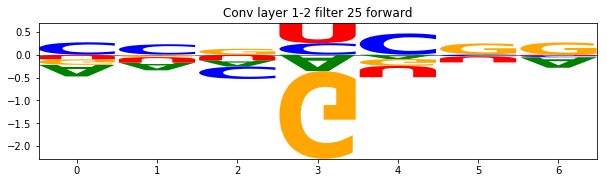

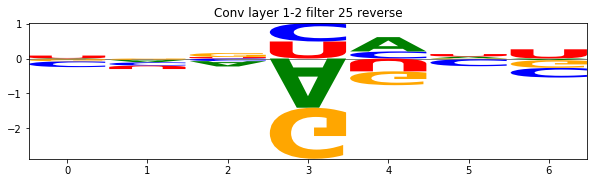

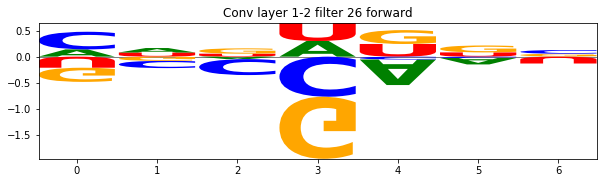

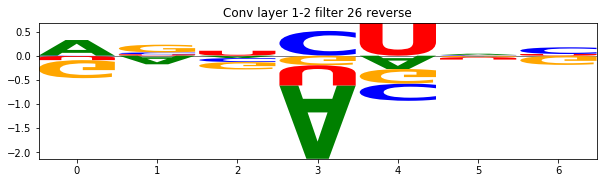

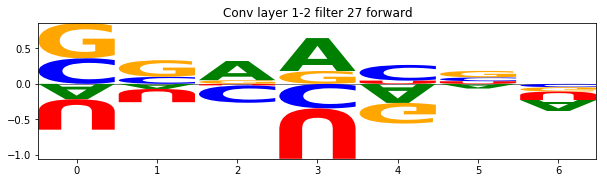

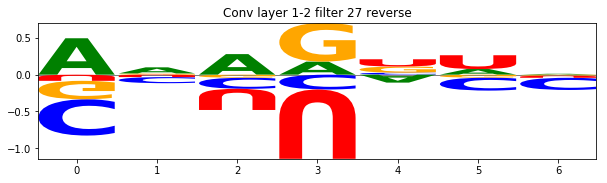

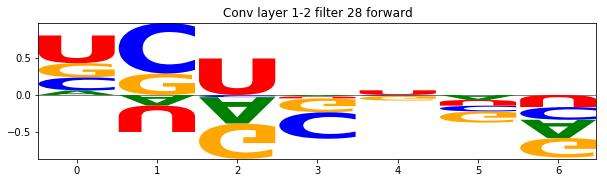

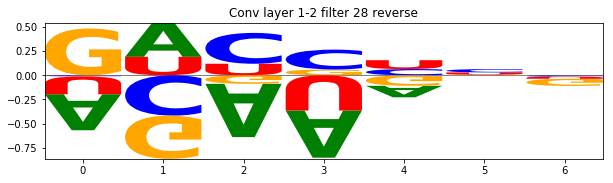

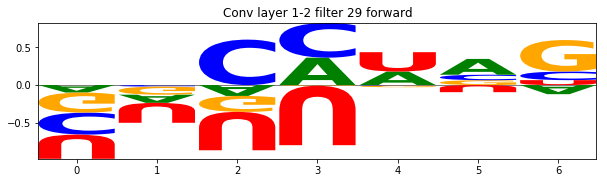

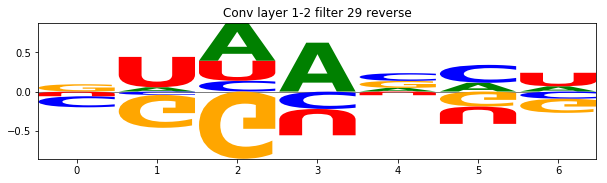

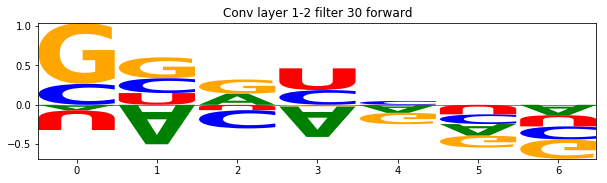

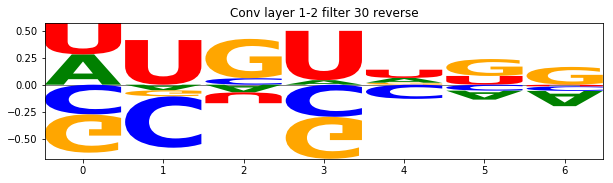

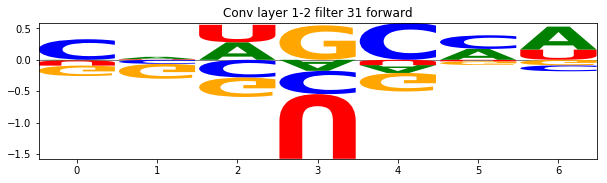

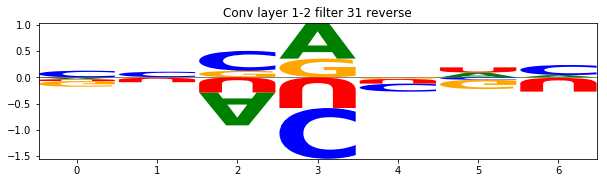

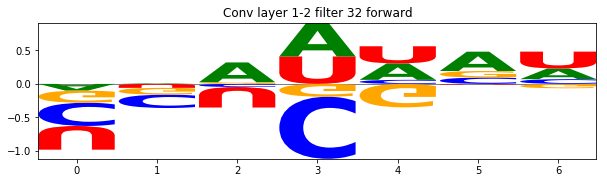

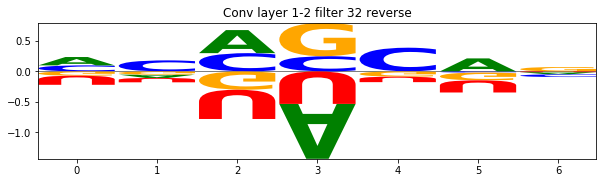

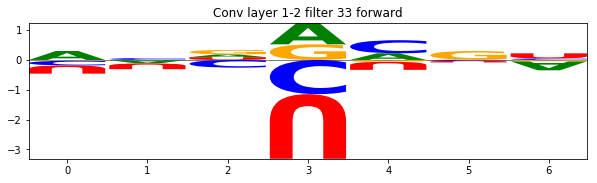

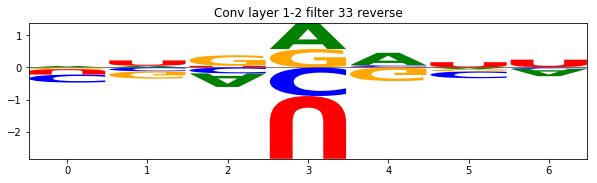

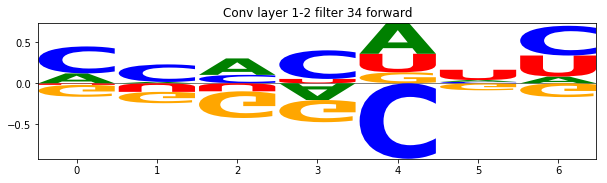

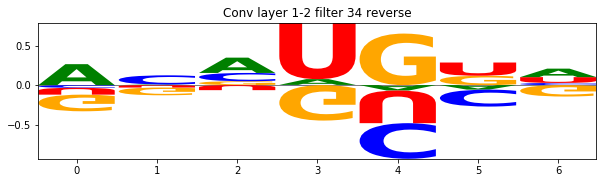

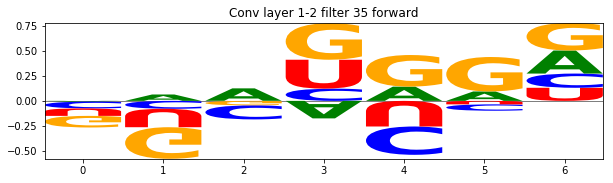

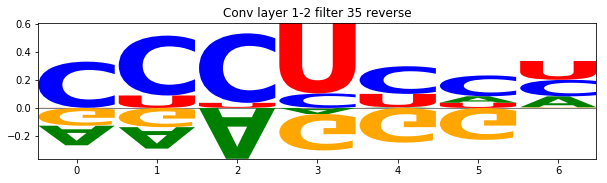

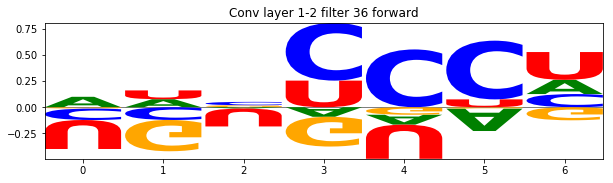

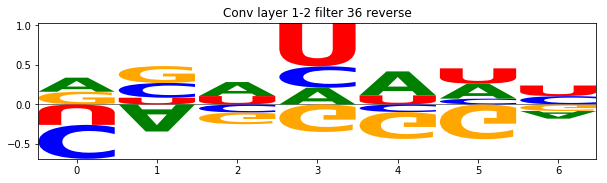

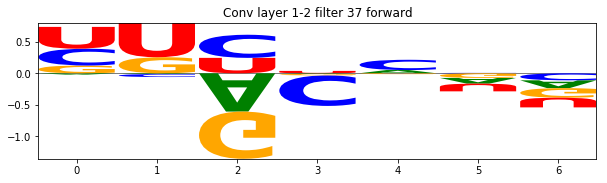

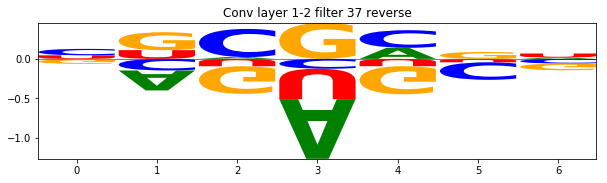

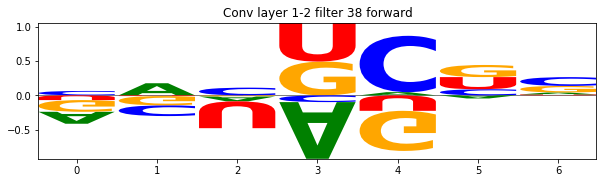

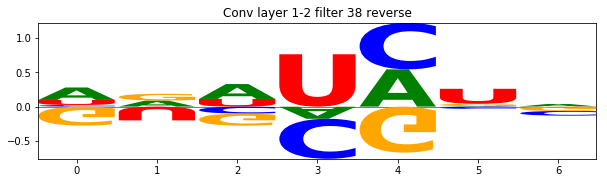

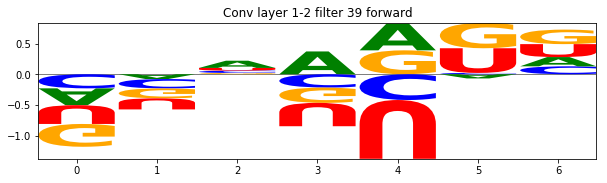

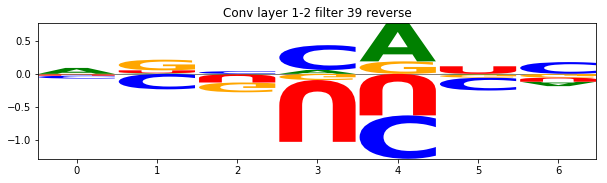

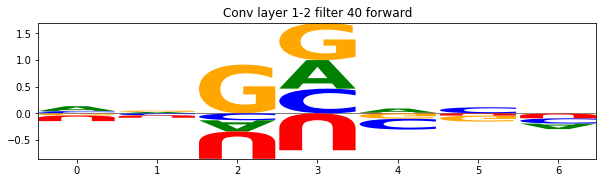

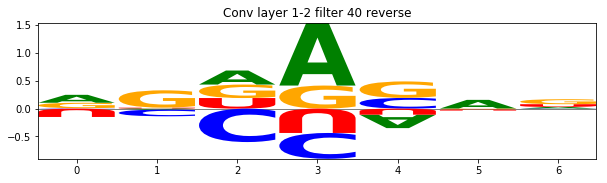

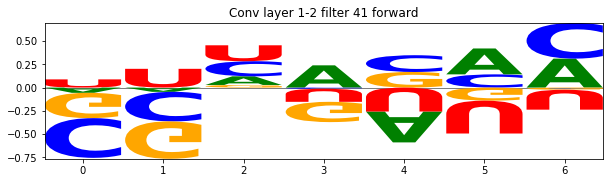

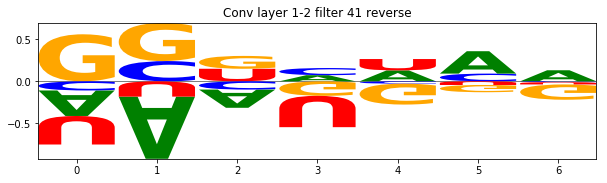

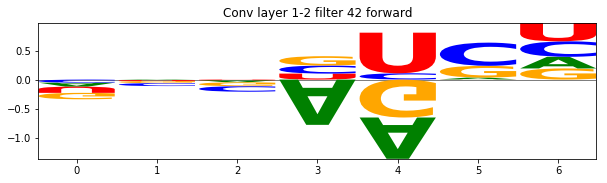

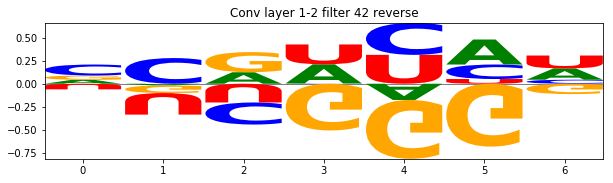

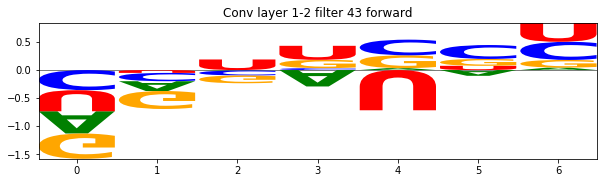

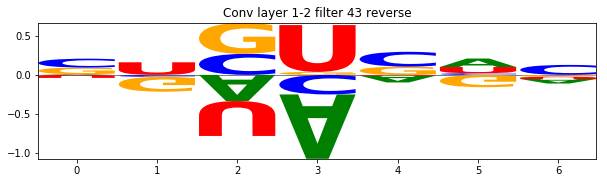

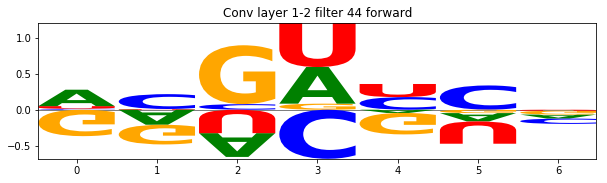

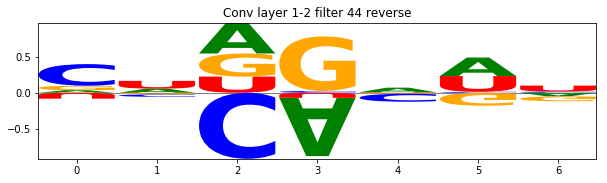

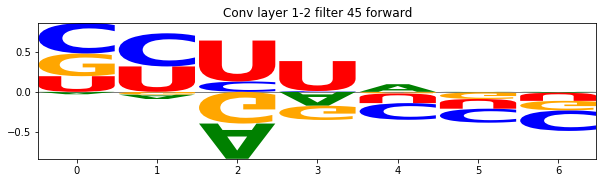

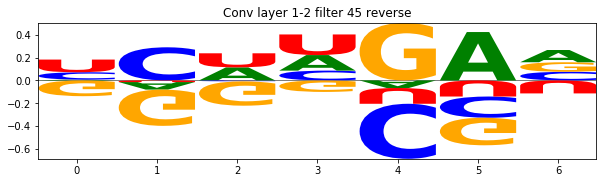

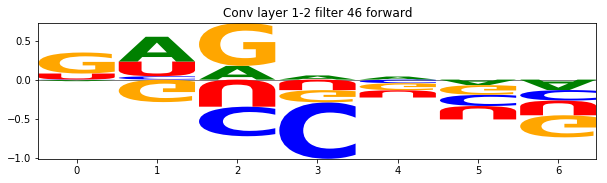

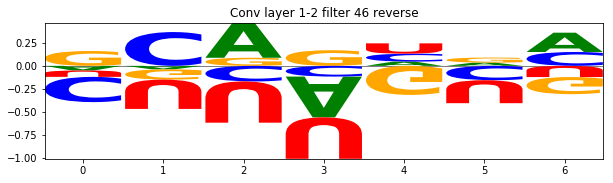

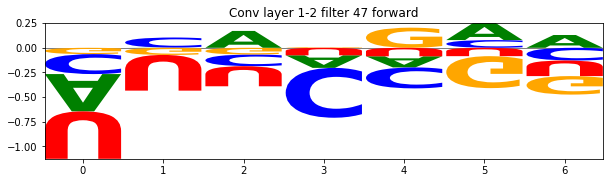

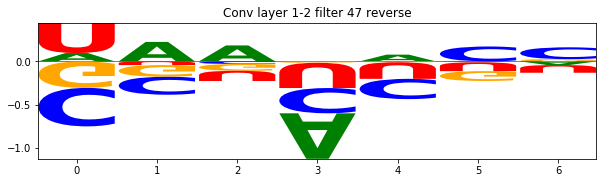

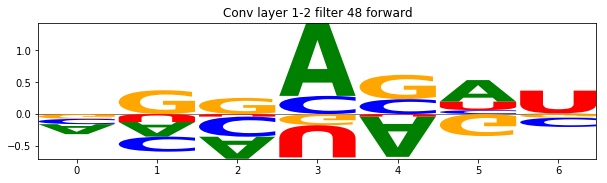

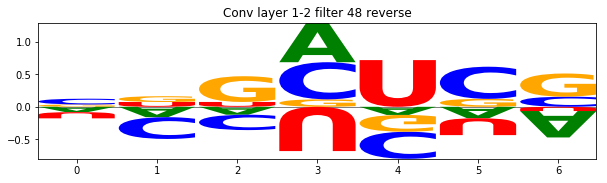

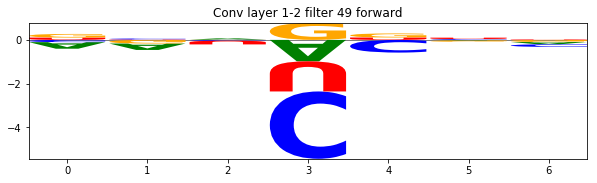

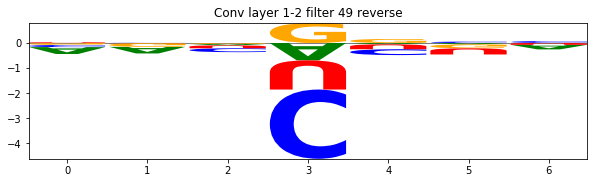

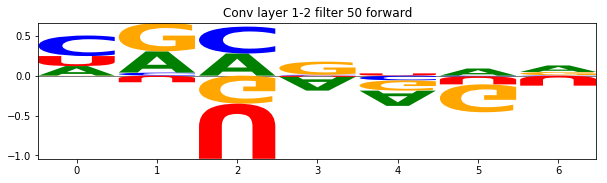

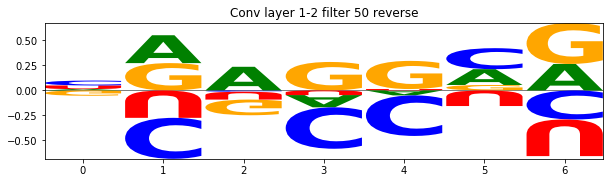

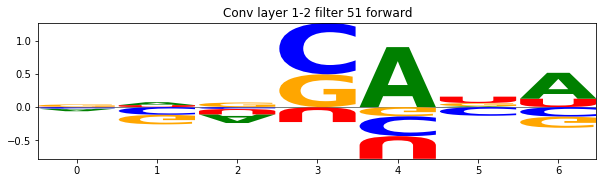

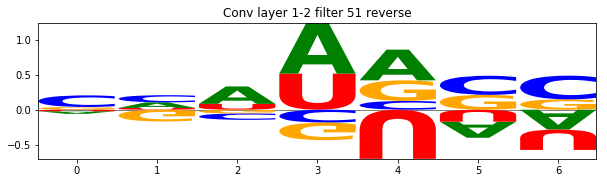

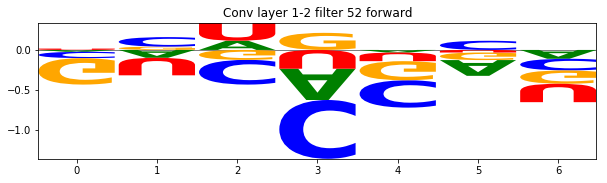

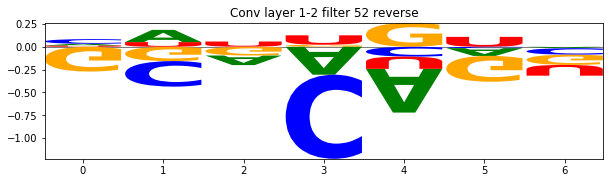

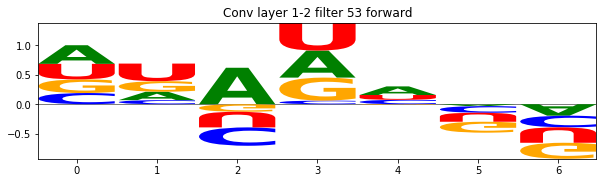

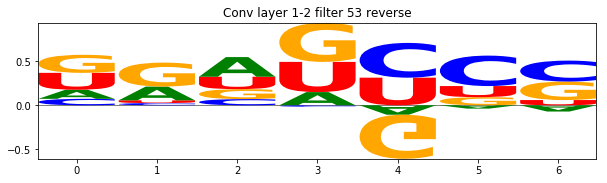

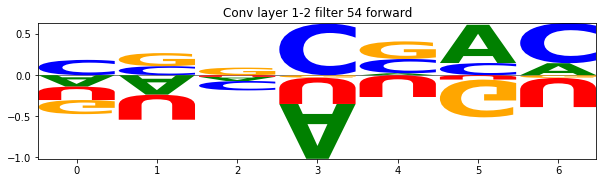

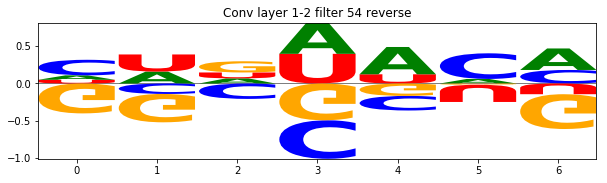

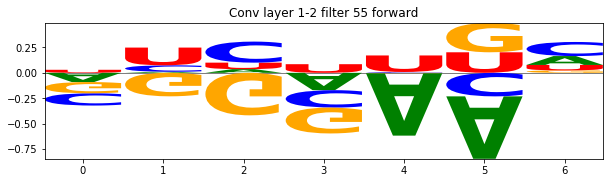

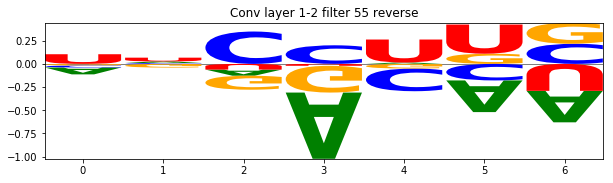

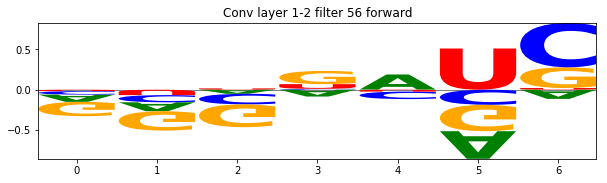

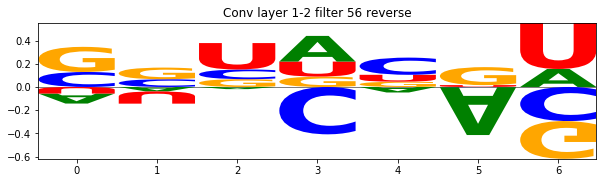

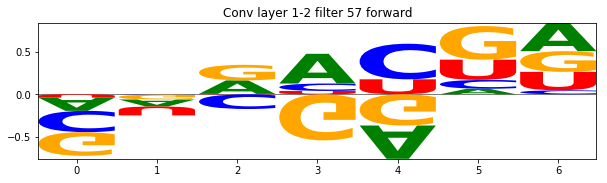

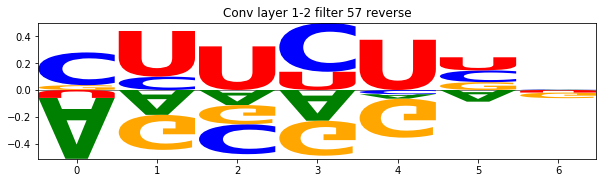

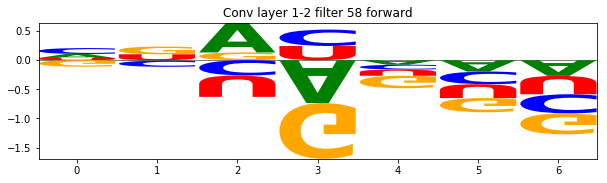

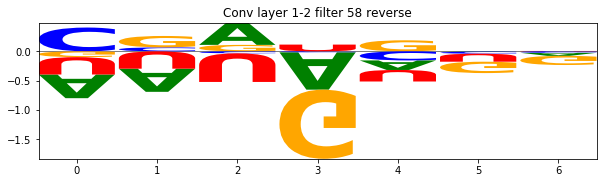

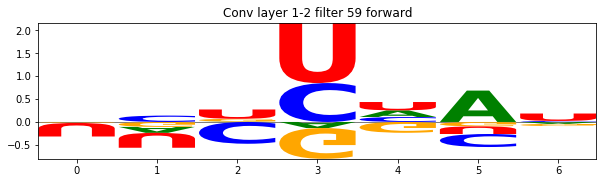

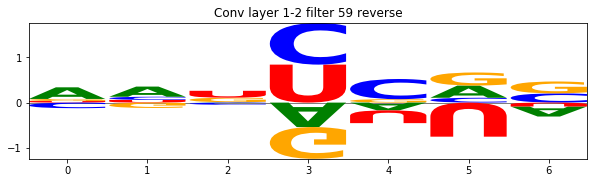

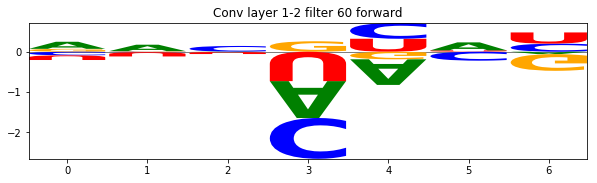

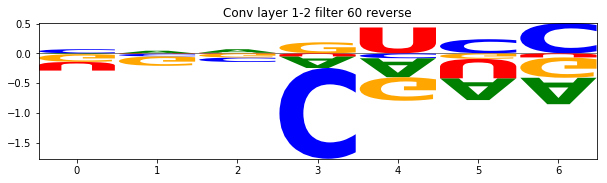

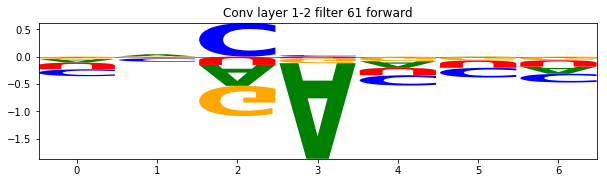

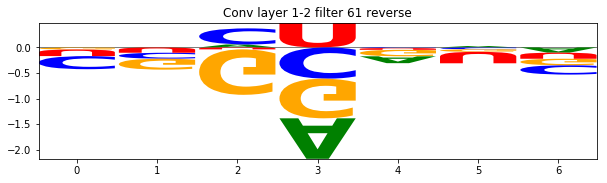

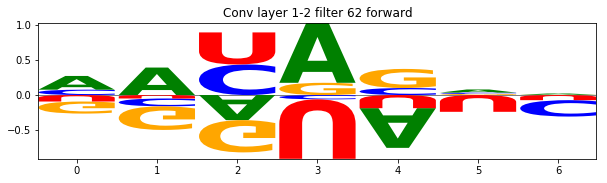

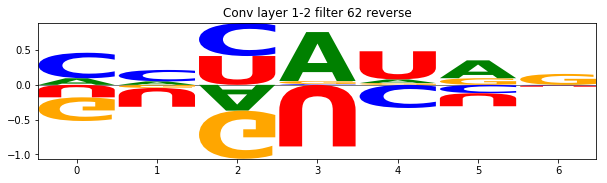

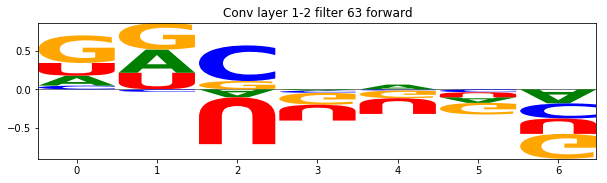

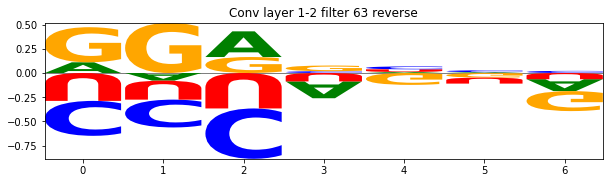

In [10]:
# conv_layer_number = [1, 3, 5, 7, 9]

conv_layer_number = [1]  # debug

for cn in conv_layer_number:
    print("Conv layer {} and {}".format(cn, cn+1))
    w_fw = model.get_layer('conv1d_{}'.format(cn)).get_weights()[0]  # 0 for weight, 1 for bias
    w_rv = model.get_layer('conv1d_{}'.format(cn+1)).get_weights()[0]
    assert len(w_fw.shape) == len(w_rv.shape)
    assert w_fw.shape[0] == w_rv.shape[0]
    assert w_fw.shape[1] == w_rv.shape[1]
    assert w_fw.shape[2] == w_rv.shape[2]
    
    for filter_id in range(w_fw.shape[2]):
#         print("Filter ID {}".format(filter_id))
#         print("Forward")
        df = w_to_df(w_fw[:, :, filter_id])
        filter_logo = logomaker.Logo(df)
        filter_logo.ax.set_title("Conv layer {}-{} filter {} forward".format(cn, cn+1, filter_id))
        filter_logo.fig.show()
#         print("Reverse")
        df = w_to_df(w_rv[:, :, filter_id])
        filter_logo = logomaker.Logo(df)
        filter_logo.ax.set_title("Conv layer {}-{} filter {} reverse".format(cn, cn+1, filter_id))
        filter_logo.fig.show()
        

In [11]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_rev (InputLayer)          (None, 51, 4)        0                                            
__________________________________________________________________________________________________
input_org (InputLayer)          (None, 51, 4)        0                                            
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 51, 4)        16          input_rev[0][0]                  
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 51, 4)        16          input_org[0][0]                  
__________________________________________________________________________________________________
activation